In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
print(df.columns)
df.head()


(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df = df.dropna(subset=['TotalCharges'])
df.reset_index(drop=True, inplace=True)


In [6]:
df.drop('customerID', axis=1, inplace=True)


In [7]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
print(df.shape)

(7032, 20)


In [13]:
import matplotlib.pyplot as plt
churn_rate=df['Churn'].value_counts(normalize= True)

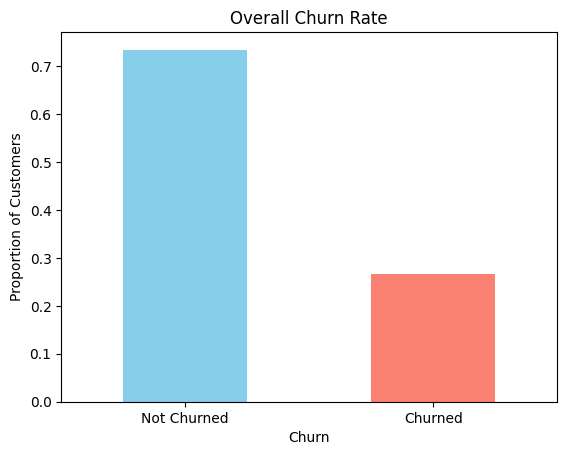

In [14]:
churn_rate.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Overall Churn Rate')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], rotation=0)
plt.ylabel('Proportion of Customers')
plt.show()

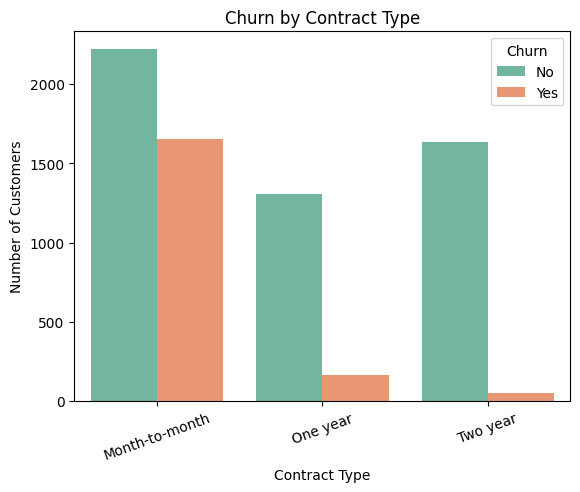

In [15]:
import seaborn as sns
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=20)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


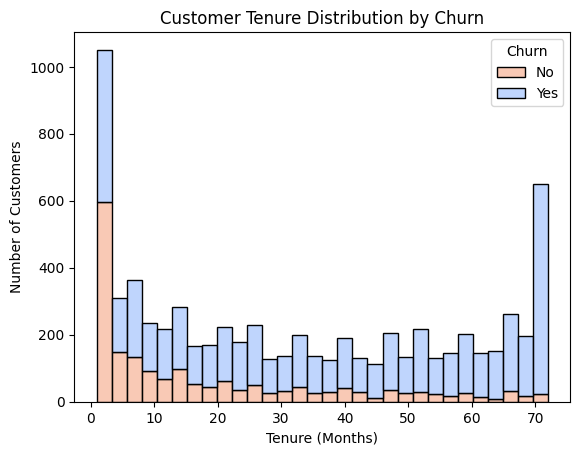

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='coolwarm')
plt.title('Customer Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


C:\Users\aishw\AppData\Local\Temp\ipykernel_2340\3832942540.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')


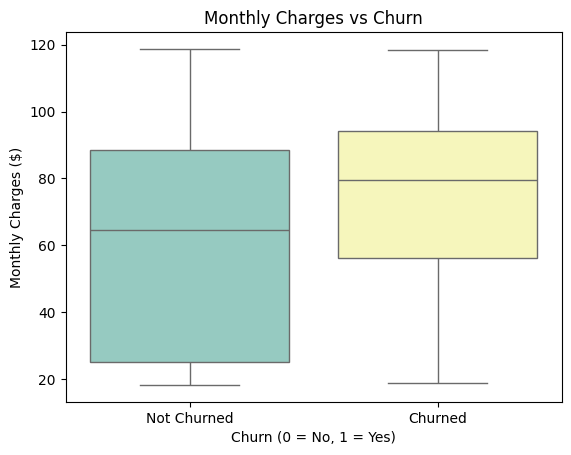

In [17]:

sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges ($)')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()


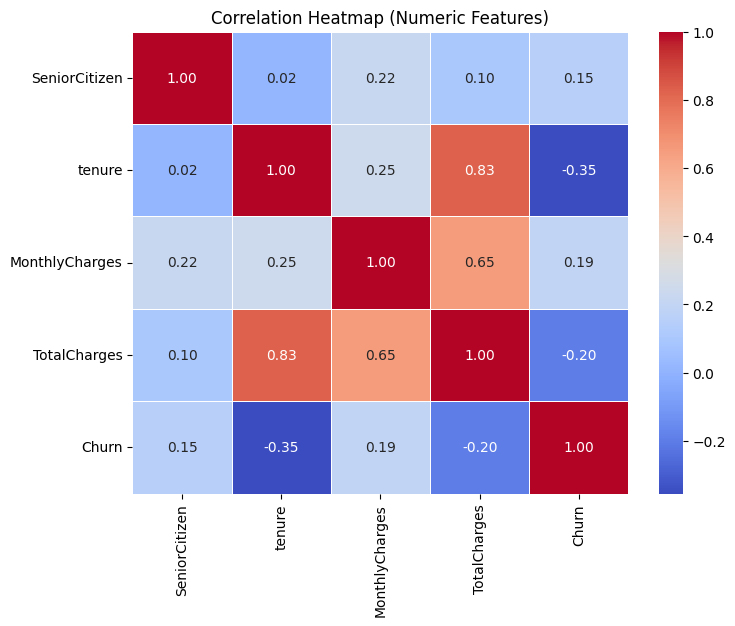

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


In [19]:

X = df.drop('Churn', axis=1)
y = df['Churn']


In [20]:

X = pd.get_dummies(X, drop_first=True)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

#Predict

y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Accuracy: 0.7853589196872779
Precision: 0.618421052631579
Recall: 0.5026737967914439
F1 Score: 0.5545722713864307


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7853589196872779
Precision: 0.6267605633802817
Recall: 0.47593582887700536
F1 Score: 0.541033434650456


In [24]:

importances = rf_model.feature_importances_
feature_names = X.columns
import pandas as pd
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# View top 10
feat_df.head(10)


,Feature,Importance
3,TotalCharges,0.193409
2,MonthlyCharges,0.169758
1,tenure,0.167572
10,InternetService_Fiber optic,0.039999
28,PaymentMethod_Electronic check,0.035016
13,OnlineSecurity_Yes,0.028905
25,Contract_Two year,0.028618
4,gender_Male,0.026971
19,TechSupport_Yes,0.025829
26,PaperlessBilling_Yes,0.025044


In [25]:

y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

y_pred_label_rf = rf_model.predict(X_test)

# Copy the test set and add churn columns
X_test_final = X_test.copy()
X_test_final['Churn_Probability'] = y_proba_rf
X_test_final['Predicted_Churn'] = y_pred_label_rf
X_test_final['Actual_Churn'] = y_test.values

# Reset index for clean CSV
X_test_final.reset_index(drop=True, inplace=True)
X_test_final.to_csv('churn_predictions_rf.csv', index=False)
